In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Informacion de las columnas
- item_id
- description: Descripcion del shipping (por ejemplo, free shipping, letter, priority mail, etc)
- est_delivery: Tiempo estimado de entrega (generalmente en días)
- price: Precio de la opción de envio [BTC] --> TARGET
- timestamp: Fecha y hora en la que se scrapeo

In [2]:
shipping_skilroad = pd.read_csv('csv/silkroad_shippings.csv')
shipping_skilroad.head()

,item_id,description,est_delivery,price,timestamp
0,jj-luna-privacy-ebooks,ebook link,1 day,0.000000,2014-02-23T05:39:22
1,the-morality-of-capitalism,letter,4 days,0.001722,2014-02-23T05:39:29
2,survive,small book (domestic),4 days,0.017217,2014-02-23T05:39:33
3,a-non-religious-new-testament,media mail parcel (domestic),4 days,0.006870,2014-02-23T05:39:37
4,mindless-slogans-101-cheap-substitutes-for-act...,ebook link,1 day,0.000000,2014-02-23T05:39:41


In [3]:
shipping_skilroad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560458 entries, 0 to 560457
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   item_id       560458 non-null  object 
 1   description   559657 non-null  object 
 2   est_delivery  560458 non-null  object 
 3   price         560423 non-null  float64
 4   timestamp     560458 non-null  object 
dtypes: float64(1), object(4)
memory usage: 21.4+ MB


In [4]:
bitcoin = pd.read_csv('csv/bitcoins.csv')
bitcoin

,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 23, 2014",272.6,210.9,297.8,217.7,7.08K,29.29%
1,"Feb 24, 2014",153.6,272.6,252.1,129.0,12.05K,-43.65%
2,"Feb 25, 2014",198.8,153.6,226.6,163.9,7.70K,29.36%
3,"Feb 26, 2014",430.6,198.8,442.1,372.3,2.33K,116.67%
4,"Feb 27, 2014",432.3,430.6,438.3,424.2,1.05K,0.39%
...,...,...,...,...,...,...,...
331,"Jan 20, 2015",183.9,188.1,188.2,179.0,4.89K,-2.24%
332,"Jan 21, 2015",196.9,183.9,199.0,183.3,5.32K,7.05%
333,"Jan 22, 2015",204.6,196.9,207.8,194.7,6.33K,3.92%
334,"Jan 23, 2015",207.8,204.6,209.7,198.2,4.28K,1.56%


In [5]:
# podemos ver que hay algunos datos con Nulls para algunas columnas como descripcion
for c in shipping_skilroad.columns:
    print("column: "+c + "\n")
    print(shipping_skilroad[c].isnull().value_counts())

column: item_id

False    560458
Name: item_id, dtype: int64
column: description

False    559657
True        801
Name: description, dtype: int64
column: est_delivery

False    560458
Name: est_delivery, dtype: int64
column: price

False    560423
True         35
Name: price, dtype: int64
column: timestamp

False    560458
Name: timestamp, dtype: int64


In [6]:
shipping_skilroad.rename(columns={'est_delivery':'delivery_days'},inplace=True)
shipping_skilroad.head()

,item_id,description,delivery_days,price,timestamp
0,jj-luna-privacy-ebooks,ebook link,1 day,0.000000,2014-02-23T05:39:22
1,the-morality-of-capitalism,letter,4 days,0.001722,2014-02-23T05:39:29
2,survive,small book (domestic),4 days,0.017217,2014-02-23T05:39:33
3,a-non-religious-new-testament,media mail parcel (domestic),4 days,0.006870,2014-02-23T05:39:37
4,mindless-slogans-101-cheap-substitutes-for-act...,ebook link,1 day,0.000000,2014-02-23T05:39:41


In [7]:
# Para los dias, y el timestamp, es conveniente trabajar con numericos
shipping_skilroad['timestamp'] = pd.to_datetime(shipping_skilroad['timestamp'])

In [8]:
shipping_skilroad.head()

,item_id,description,delivery_days,price,timestamp
0,jj-luna-privacy-ebooks,ebook link,1 day,0.000000,2014-02-23 05:39:22
1,the-morality-of-capitalism,letter,4 days,0.001722,2014-02-23 05:39:29
2,survive,small book (domestic),4 days,0.017217,2014-02-23 05:39:33
3,a-non-religious-new-testament,media mail parcel (domestic),4 days,0.006870,2014-02-23 05:39:37
4,mindless-slogans-101-cheap-substitutes-for-act...,ebook link,1 day,0.000000,2014-02-23 05:39:41


In [9]:
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])

In [10]:
bitcoin.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2014-02-23,272.6,210.9,297.8,217.7,7.08K,29.29%
1,2014-02-24,153.6,272.6,252.1,129.0,12.05K,-43.65%
2,2014-02-25,198.8,153.6,226.6,163.9,7.70K,29.36%
3,2014-02-26,430.6,198.8,442.1,372.3,2.33K,116.67%
4,2014-02-27,432.3,430.6,438.3,424.2,1.05K,0.39%


In [11]:
def make_numeric(x):
    num = ""
    for letter in x:
        if letter.isnumeric():
            num +=letter
    return num

In [12]:
shipping_skilroad['delivery_days'] = shipping_skilroad['delivery_days'].map(make_numeric)
shipping_skilroad['delivery_days']

0         1
1         4
2         4
3         4
4         1
         ..
560453    3
560454    3
560455    1
560456    3
560457    7
Name: delivery_days, Length: 560458, dtype: object

In [16]:
#shipping_skilroad.fillna(0,inplace=True)
#shipping_skilroad['delivery_days'] = shipping_skilroad['delivery_days'].astype(int)
shipping_skilroad['delivery_days'].isnull().value_counts()

False    560458
Name: delivery_days, dtype: int64

In [14]:
shipping_skilroad.head()

,item_id,description,delivery_days,price,timestamp
0,jj-luna-privacy-ebooks,ebook link,1,0.000000,2014-02-23 05:39:22
1,the-morality-of-capitalism,letter,4,0.001722,2014-02-23 05:39:29
2,survive,small book (domestic),4,0.017217,2014-02-23 05:39:33
3,a-non-religious-new-testament,media mail parcel (domestic),4,0.006870,2014-02-23 05:39:37
4,mindless-slogans-101-cheap-substitutes-for-act...,ebook link,1,0.000000,2014-02-23 05:39:41


In [17]:
shipping_skilroad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560458 entries, 0 to 560457
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_id        560458 non-null  object        
 1   description    560458 non-null  object        
 2   delivery_days  560458 non-null  object        
 3   price          560458 non-null  float64       
 4   timestamp      560458 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 21.4+ MB


In [18]:
shipping_skilroad['date'] =shipping_skilroad['timestamp'].dt.date

In [19]:
shipping_skilroad['year'] = shipping_skilroad['timestamp'].dt.year
shipping_skilroad.head()

,item_id,description,delivery_days,price,timestamp,date,year
0,jj-luna-privacy-ebooks,ebook link,1,0.000000,2014-02-23 05:39:22,2014-02-23,2014
1,the-morality-of-capitalism,letter,4,0.001722,2014-02-23 05:39:29,2014-02-23,2014
2,survive,small book (domestic),4,0.017217,2014-02-23 05:39:33,2014-02-23,2014
3,a-non-religious-new-testament,media mail parcel (domestic),4,0.006870,2014-02-23 05:39:37,2014-02-23,2014
4,mindless-slogans-101-cheap-substitutes-for-act...,ebook link,1,0.000000,2014-02-23 05:39:41,2014-02-23,2014


In [20]:
shipping_skilroad['day_num'] = shipping_skilroad['timestamp'].dt.day
shipping_skilroad.head()

,item_id,description,delivery_days,price,timestamp,date,year,day_num
0,jj-luna-privacy-ebooks,ebook link,1,0.000000,2014-02-23 05:39:22,2014-02-23,2014,23
1,the-morality-of-capitalism,letter,4,0.001722,2014-02-23 05:39:29,2014-02-23,2014,23
2,survive,small book (domestic),4,0.017217,2014-02-23 05:39:33,2014-02-23,2014,23
3,a-non-religious-new-testament,media mail parcel (domestic),4,0.006870,2014-02-23 05:39:37,2014-02-23,2014,23
4,mindless-slogans-101-cheap-substitutes-for-act...,ebook link,1,0.000000,2014-02-23 05:39:41,2014-02-23,2014,23


In [21]:
shipping_skilroad['month_num'] = shipping_skilroad['timestamp'].dt.month
shipping_skilroad.head()

,item_id,description,delivery_days,price,timestamp,date,year,day_num,month_num
0,jj-luna-privacy-ebooks,ebook link,1,0.000000,2014-02-23 05:39:22,2014-02-23,2014,23,2
1,the-morality-of-capitalism,letter,4,0.001722,2014-02-23 05:39:29,2014-02-23,2014,23,2
2,survive,small book (domestic),4,0.017217,2014-02-23 05:39:33,2014-02-23,2014,23,2
3,a-non-religious-new-testament,media mail parcel (domestic),4,0.006870,2014-02-23 05:39:37,2014-02-23,2014,23,2
4,mindless-slogans-101-cheap-substitutes-for-act...,ebook link,1,0.000000,2014-02-23 05:39:41,2014-02-23,2014,23,2


In [22]:
del shipping_skilroad['timestamp']

In [23]:
shipping_skilroad['year'].value_counts()

2014    553798
2015      6660
Name: year, dtype: int64

In [28]:
shipping_skilroad

,item_id,description,delivery_days,price,date,year,day_num,month_num
0,jj-luna-privacy-ebooks,ebook link,1,0.000000,2014-02-23,2014,23,2
1,the-morality-of-capitalism,letter,4,0.001722,2014-02-23,2014,23,2
2,survive,small book (domestic),4,0.017217,2014-02-23,2014,23,2
3,a-non-religious-new-testament,media mail parcel (domestic),4,0.006870,2014-02-23,2014,23,2
4,mindless-slogans-101-cheap-substitutes-for-act...,ebook link,1,0.000000,2014-02-23,2014,23,2
...,...,...,...,...,...,...,...,...
560453,us-only-250x-140mg-pure-84-mdma-capsules-aidoneus,Priority Mail,3,0.018512,2015-01-24,2015,24,1
560454,us-only-250x-140mg-pure-84-mdma-capsules,Priority Mail,3,0.018363,2015-01-24,2015,24,1
560455,us-only-10x-140mg-pure-84-mdma-capsules-aidoneus,Priority Mail Express,1,0.064269,2015-01-24,2015,24,1
560456,us-only-10x-140mg-pure-84-mdma-capsules-aidoneus,Priority Mail,3,0.018363,2015-01-24,2015,24,1


In [30]:
bitcoin.rename(columns={'Date':'date'},inplace=True)
bitcoin

,date,Price,Open,High,Low,Vol.,Change %
0,2014-02-23,272.6,210.9,297.8,217.7,7.08K,29.29%
1,2014-02-24,153.6,272.6,252.1,129.0,12.05K,-43.65%
2,2014-02-25,198.8,153.6,226.6,163.9,7.70K,29.36%
3,2014-02-26,430.6,198.8,442.1,372.3,2.33K,116.67%
4,2014-02-27,432.3,430.6,438.3,424.2,1.05K,0.39%
...,...,...,...,...,...,...,...
331,2015-01-20,183.9,188.1,188.2,179.0,4.89K,-2.24%
332,2015-01-21,196.9,183.9,199.0,183.3,5.32K,7.05%
333,2015-01-22,204.6,196.9,207.8,194.7,6.33K,3.92%
334,2015-01-23,207.8,204.6,209.7,198.2,4.28K,1.56%


In [35]:
bitcoin.date = bitcoin.date.astype('datetime64[ns]')
shipping_skilroad.date = shipping_skilroad.date.astype('datetime64[ns]')

In [40]:
merged = shipping_skilroad.merge(bitcoin,on='date',how='left')
shipping = merged[['item_id','description','delivery_days','price','Price','date','year','month_num','day_num']]

In [41]:
col = {'price':'price_in_btc','Price':'btc_price'}
shipping.rename(columns=col,inplace=True)

C:\Users\alejo\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [42]:
shipping

,item_id,description,delivery_days,price_in_btc,btc_price,date,year,month_num,day_num
0,jj-luna-privacy-ebooks,ebook link,1,0.000000,272.6,2014-02-23,2014,2,23
1,the-morality-of-capitalism,letter,4,0.001722,272.6,2014-02-23,2014,2,23
2,survive,small book (domestic),4,0.017217,272.6,2014-02-23,2014,2,23
3,a-non-religious-new-testament,media mail parcel (domestic),4,0.006870,272.6,2014-02-23,2014,2,23
4,mindless-slogans-101-cheap-substitutes-for-act...,ebook link,1,0.000000,272.6,2014-02-23,2014,2,23
...,...,...,...,...,...,...,...,...,...
560453,us-only-250x-140mg-pure-84-mdma-capsules-aidoneus,Priority Mail,3,0.018512,220.4,2015-01-24,2015,1,24
560454,us-only-250x-140mg-pure-84-mdma-capsules,Priority Mail,3,0.018363,220.4,2015-01-24,2015,1,24
560455,us-only-10x-140mg-pure-84-mdma-capsules-aidoneus,Priority Mail Express,1,0.064269,220.4,2015-01-24,2015,1,24
560456,us-only-10x-140mg-pure-84-mdma-capsules-aidoneus,Priority Mail,3,0.018363,220.4,2015-01-24,2015,1,24


In [69]:
shipping['EU_price'] = shipping['price_in_btc']*shipping['btc_price']
shipping

<ipython-input-69-817b46c64216>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shipping['EU_price'] = shipping['price_in_btc']*shipping['btc_price']


,item_id,description,delivery_days,price_in_btc,btc_price,date,year,month_num,day_num,EU_price
0,jj-luna-privacy-ebooks,ebook link,1,0.000000,272.6,2014-02-23,2014,2,23,0.000000
1,the-morality-of-capitalism,letter,4,0.001722,272.6,2014-02-23,2014,2,23,0.469417
2,survive,small book (domestic),4,0.017217,272.6,2014-02-23,2014,2,23,4.693354
3,a-non-religious-new-testament,media mail parcel (domestic),4,0.006870,272.6,2014-02-23,2014,2,23,1.872762
4,mindless-slogans-101-cheap-substitutes-for-act...,ebook link,1,0.000000,272.6,2014-02-23,2014,2,23,0.000000
...,...,...,...,...,...,...,...,...,...,...
560453,us-only-250x-140mg-pure-84-mdma-capsules-aidoneus,Priority Mail,3,0.018512,220.4,2015-01-24,2015,1,24,4.080045
560454,us-only-250x-140mg-pure-84-mdma-capsules,Priority Mail,3,0.018363,220.4,2015-01-24,2015,1,24,4.047205
560455,us-only-10x-140mg-pure-84-mdma-capsules-aidoneus,Priority Mail Express,1,0.064269,220.4,2015-01-24,2015,1,24,14.164888
560456,us-only-10x-140mg-pure-84-mdma-capsules-aidoneus,Priority Mail,3,0.018363,220.4,2015-01-24,2015,1,24,4.047205


In [71]:
#filtramos los precios ridiculamente altos de envio.
shipping_short= shipping[(shipping['EU_price'] >= 0) & (shipping['EU_price'] <= 5000)]

In [74]:
shipping_short.groupby(['month_num'])['EU_price'].max()

month_num
1      426.527557
2     2419.200000
6     3799.305000
7      953.462045
8     4011.000000
9     3067.680000
10    1098.976067
11    1065.192714
Name: EU_price, dtype: float64

Text(0.5, 1.0, 'Cantidad de shippings por año')

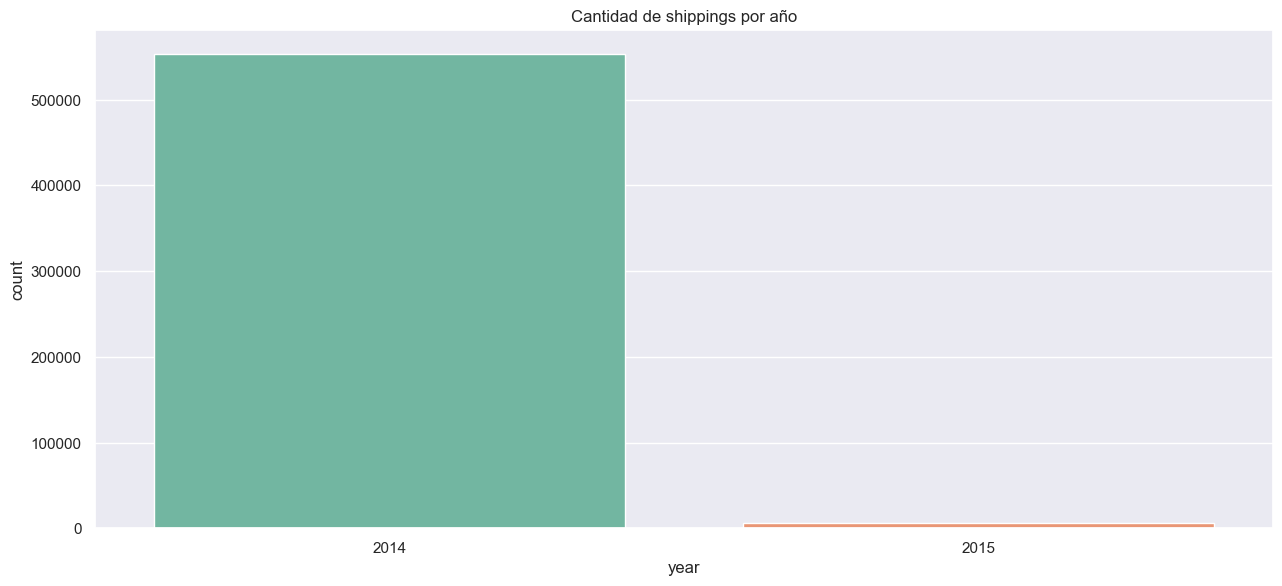

In [45]:
sns.set(rc={"figure.dpi":100,'figure.figsize':(15.2,6.6)})
ax = sns.countplot(data=shipping,x='year',palette='Set2')
ax.set_title('Cantidad de shippings por año')

Text(0.5, 1.0, 'Cantidad de shippings por mes')

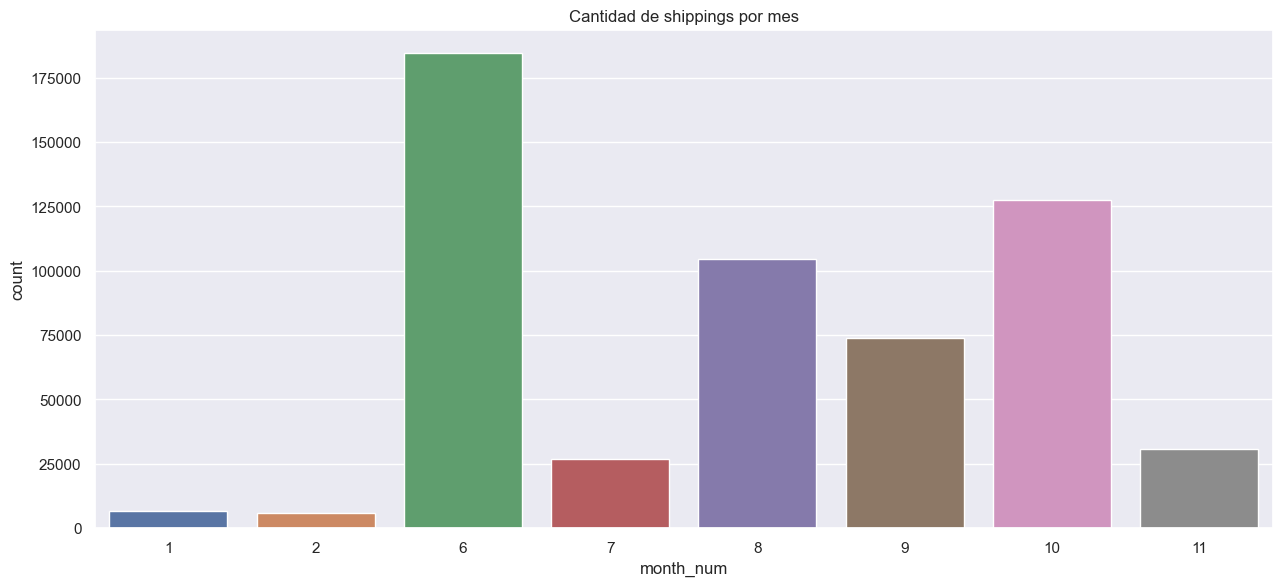

In [54]:
sns.set(rc={"figure.dpi":100,'figure.figsize':(15.2,6.6)})
ax = sns.countplot(data=shipping_filtered,x='month_num')
ax.set_title('Cantidad de shippings por mes')

Text(0.5, 1.0, 'Shippings por Dias que tarda el delivery')

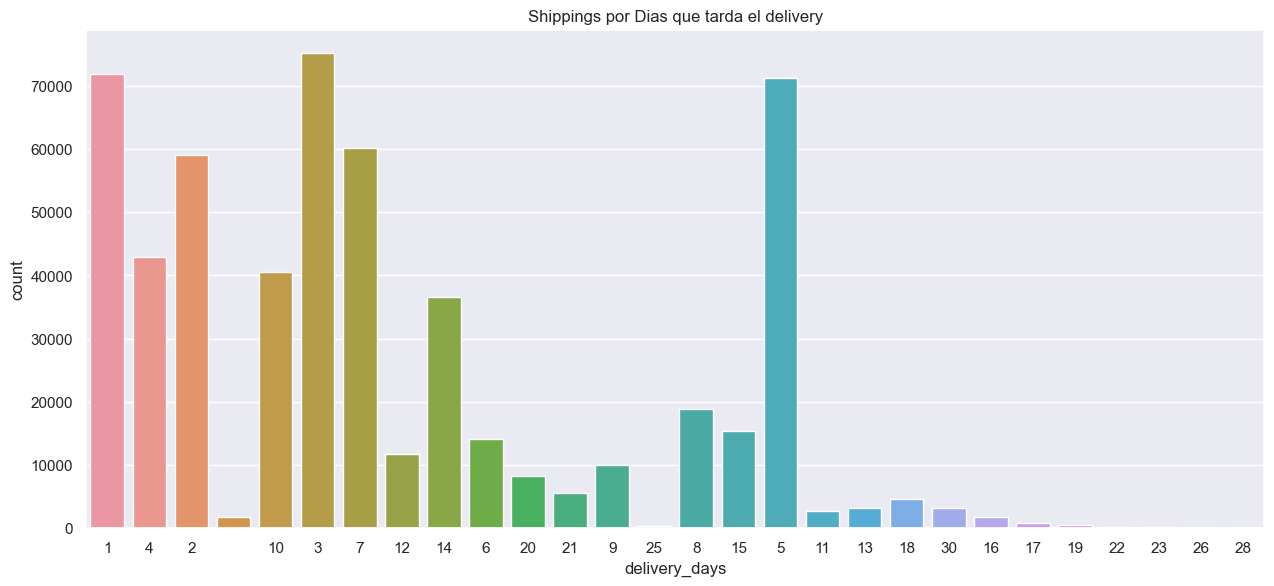

In [47]:
sns.set(rc={"figure.dpi":100,'figure.figsize':(15.2,6.6)})
ax = sns.countplot(data=shipping_skilroad,x='delivery_days')
ax.set_title('Shippings por Dias que tarda el delivery')

In [27]:
shipping_skilroad['price'].isnull().sum()

0

Text(0.5, 0, 'Mes')

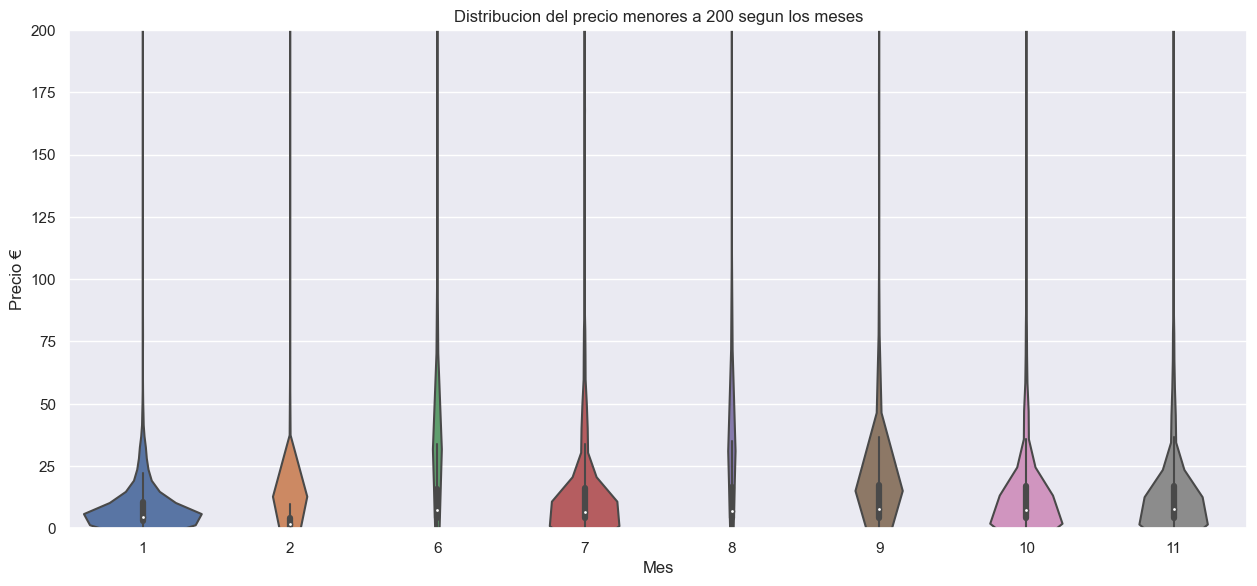

In [82]:
sns.set(rc={"figure.dpi":100,'figure.figsize':(15.2,6.6)})
plt.ylim((0,200))
ax = sns.violinplot(data=shipping_short,y='EU_price',x='month_num')
ax.set_title('Distribucion del precio menores a 200 segun los meses')
ax.set_ylabel("Precio €")
ax.set_xlabel("Mes")

Text(0.5, 0, 'Año')

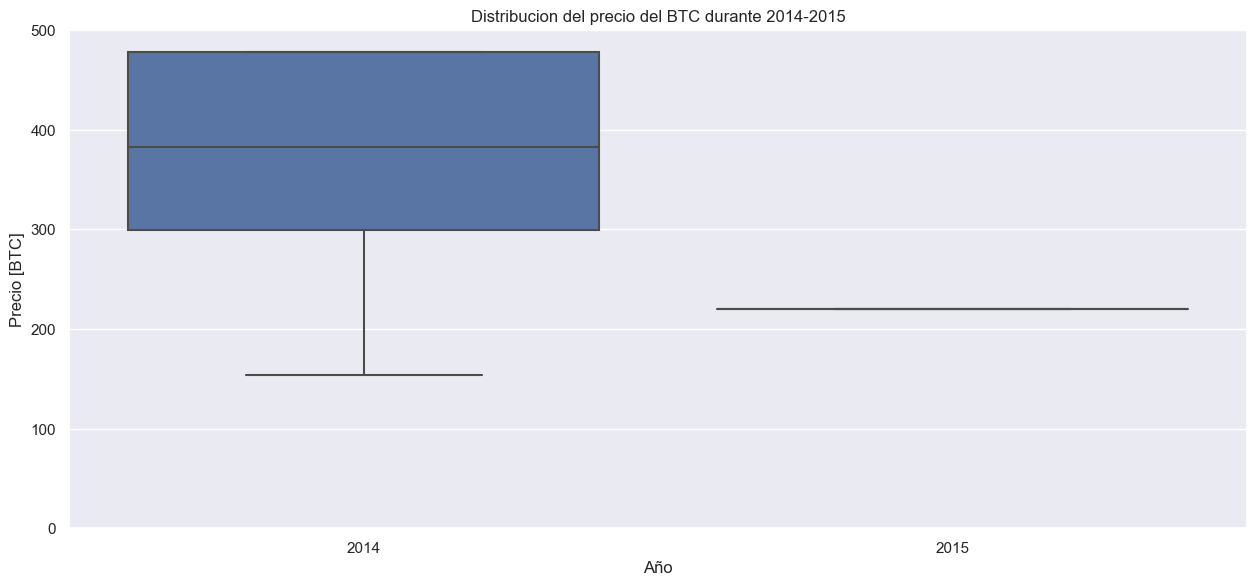

In [88]:
sns.set(rc={"figure.dpi":100,'figure.figsize':(15.2,6.6)})
plt.ylim((0,500))
ax = sns.boxplot(data=shipping_short,y='btc_price',x='year')
ax.set_title('Distribucion del precio del BTC durante 2014-2015')
ax.set_ylabel("Precio [BTC]")
ax.set_xlabel("Año")

In [87]:
del shipping_skilroad['timestamp']

In [88]:
shipping_skilroad.head()

,item_id,description,delivery_days,price,year,day_num,month_num
0,jj-luna-privacy-ebooks,ebook link,1,0.000000,2014,23,2
1,the-morality-of-capitalism,letter,4,0.001722,2014,23,2
2,survive,small book (domestic),4,0.017217,2014,23,2
3,a-non-religious-new-testament,media mail parcel (domestic),4,0.006870,2014,23,2
4,mindless-slogans-101-cheap-substitutes-for-act...,ebook link,1,0.000000,2014,23,2


In [89]:
versus = pd.read_csv('csv/versus.csv')
versus

,title,warnings,Type,Category,From,Stock,Sales,price,price_unit,timestamp
0,1oz. Distillate(FLAVORED),promoted,Physical,Concentrates,United States of America,88,9,115.96 EUR,per 1oz.,2021-10-24T04:07:09.509623
1,***3G for the price of 2G***,promoted,Physical,Cocaine,United Kingdom of Great Britain,Unlimited,5,70.91 EUR,per per unit,2021-10-24T04:07:09.509623
2,RAW THC DISTILLATE 1L (1000ml) $3 per gram Don...,promoted,Physical,Concentrates,United States of America,50,0,2576.90 EUR,per 1000ml / 1 Liter,2021-10-24T04:07:09.509623
3,**Free** Colombian Coke Giveaway! 3.5G + 0.5G ...,promoted,Physical,Cocaine,United Kingdom of Great Britain,32,10,277.76 EUR,per 3.5G + 0.5G Free,2021-10-24T04:07:09.509623
4,***OPENING SALE 3.5G PURE CHAMPAGNE MDMA***,promoted,Physical,MDMA,United States of America,447,2,128.84 EUR,per gram,2021-10-24T04:07:09.509623
...,...,...,...,...,...,...,...,...,...,...
16010,25x 105mcg The Toltec Myth - 99.5% Needlepoint...,NaN,Physical,LSD,Germany,500,0,75.00 EUR,per unit,2021-10-24T04:36:57.273498
16011,DCC ( new version of Eutylone from Cathinone ...,NaN,Physical,RC,China,Unlimited,1,1.15 EUR,per grams,2021-10-24T04:36:57.273498
16012,0.5 Gram Sample Amnesia Haze | TOPSHELF,NaN,Physical,Buds & Flowers,Germany,Unlimited,2,4.99 EUR,per Piece(s),2021-10-24T04:36:57.273498
16013,5g Lemon Tree â Cali Weed â 25% THC,NaN,Physical,Buds & Flowers,Germany,9,1,67.50 EUR,per Unit,2021-10-24T04:36:57.273498
